In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
sns.set_style("darkgrid")

In [ ]:
# importing the cleaned file
upload = files.upload()
data = pd.read_csv("upsampled.csv")
data.head()

Saving upsampled.csv to upsampled (1).csv


,Unnamed: 0,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,CUS_Target,TAR_Desc,Status,CUS_birth_year
0,0,49,7116.64,1,MARRIED,25,4758311.63,887,5659653.33,65,2231,EXECUTIVE,0,1970
1,1,46,1500000.00,0,SINGLE,14,139363.22,97,87000.00,10,2223,LOW,0,1973
2,2,53,5000000.00,0,SINGLE,14,37375.46,53,1020883.70,27,2222,MIDDLE,0,1966
3,3,15,500.00,0,SINGLE,14,4000.00,1,76946.96,12,2223,LOW,0,2004
4,4,48,9000000.00,0,SINGLE,5,338470.29,60,442100.00,21,2223,LOW,0,1971


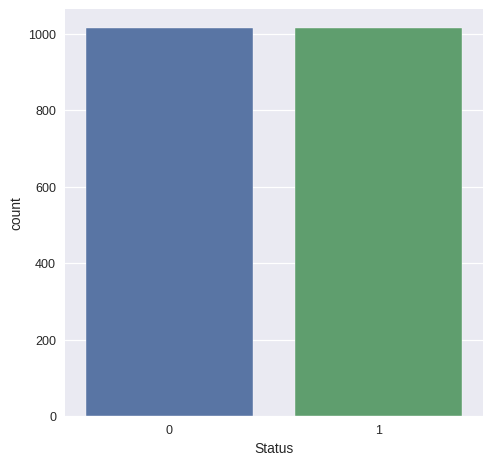

In [ ]:
plt.figure(figsize=(6,6), dpi=90)
sns.countplot(data=data, x="Status")
plt.show()

In [ ]:
df = data.copy()

In [ ]:
# get dummies
def get_dummies(arr):
  dum_data = pd.DataFrame()
  for col in arr:
    temp = None
    temp = pd.get_dummies(df[col])
    dum_data = pd.concat([dum_data, temp], axis=1)
  return dum_data

# categorical variable
dum = ["CUS_Marital_Status","TAR_Desc"]
dum_df = get_dummies(dum)
dum_df.head()

,DIVORCE,MARRIED,OTHER,PARTNER,SINGLE,WIDOWED,EXECUTIVE,LOW,MIDDLE,PLATINUM
0,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,1,0,0,1,0,0


In [ ]:
# concatenation of tables
df = pd.concat([df,dum_df], axis=1)
df.drop(["CUS_Marital_Status","TAR_Desc", "Unnamed: 0"], axis=1, inplace=True)
df.head()

,AGE,CUS_Month_Income,CUS_Gender,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,CUS_Target,Status,...,DIVORCE,MARRIED,OTHER,PARTNER,SINGLE,WIDOWED,EXECUTIVE,LOW,MIDDLE,PLATINUM
0,49,7116.64,1,25,4758311.63,887,5659653.33,65,2231,0,...,0,1,0,0,0,0,1,0,0,0
1,46,1500000.00,0,14,139363.22,97,87000.00,10,2223,0,...,0,0,0,0,1,0,0,1,0,0
2,53,5000000.00,0,14,37375.46,53,1020883.70,27,2222,0,...,0,0,0,0,1,0,0,0,1,0
3,15,500.00,0,14,4000.00,1,76946.96,12,2223,0,...,0,0,0,0,1,0,0,1,0,0
4,48,9000000.00,0,5,338470.29,60,442100.00,21,2223,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
# splitting the x and y variables
x = df.drop("Status", axis=1)
y = df.loc[:,"Status"]

In [ ]:
# splittng into train and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

#checking the distribution
for i in [x_train, x_test, y_train, y_test]:
  print(i.shape)

(1624, 20)
(406, 20)
(1624,)
(406,)


In [ ]:
x_train.head(3)

,AGE,CUS_Month_Income,CUS_Gender,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,CUS_Target,CUS_birth_year,DIVORCE,MARRIED,OTHER,PARTNER,SINGLE,WIDOWED,EXECUTIVE,LOW,MIDDLE,PLATINUM
1597,71,4200000.0,1,14,32007.72,14,0.00,0,2223,1948,0,1,0,0,0,0,0,1,0,0
1472,39,2450.0,1,14,0.00,0,50.00,1,2223,1980,0,0,0,0,1,0,0,1,0,0
944,28,1000.0,0,14,115498.78,63,115766.67,15,2223,1991,0,0,0,0,1,0,0,1,0,0


In [ ]:
# using standard scaler to minimize the standard deviation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train.iloc[:,[0,1,3,4,5,6,7,8,9]])

x_train.iloc[:,[0,1,3,4,5,6,7,8,9]] = scaler.transform(x_train.iloc[:,[0,1,3,4,5,6,7,8,9]])
x_test.iloc[:,[0,1,3,4,5,6,7,8,9]] = scaler.transform(x_test.iloc[:,[0,1,3,4,5,6,7,8,9]])

In [ ]:
#check the standard deviation 
x_train.iloc[:,[0,1,3,4,5,6,7,8,9]].std()

AGE                          1.000308
CUS_Month_Income             1.000308
YEARS_WITH_US                1.000308
total debit amount           1.000308
total debit transactions     1.000308
total credit amount          1.000308
total credit transactions    1.000308
CUS_Target                   1.000308
CUS_birth_year               1.000308
dtype: float64

# Neural Network

In [ ]:
# converting all the data into float32 before passing into tensorflow model
x_train_a = np.asarray(x_train).astype(np.float32)
x_test_a = np.asarray(x_test).astype(np.float32)

In [ ]:
# building nueral network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import L2

In [ ]:
model = Sequential()

regularizer = L2(0.01)
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train_a, y_train, validation_data=(x_test_a, y_test), epochs=300)

Epoch 1/300
51/51 [==============================] - 2s 11ms/step - loss: 0.1875 - accuracy: 0.9329 - val_loss: 0.6485 - val_accuracy: 0.8990
Epoch 2/300
51/51 [==============================] - 0s 5ms/step - loss: 0.1757 - accuracy: 0.9415 - val_loss: 0.6431 - val_accuracy: 0.8990
Epoch 3/300
51/51 [==============================] - 0s 5ms/step - loss: 0.1763 - accuracy: 0.9329 - val_loss: 0.6323 - val_accuracy: 0.9039
Epoch 4/300
51/51 [==============================] - 0s 5ms/step - loss: 0.1788 - accuracy: 0.9403 - val_loss: 0.6221 - val_accuracy: 0.8990
Epoch 5/300
51/51 [==============================] - 0s 4ms/step - loss: 0.1784 - accuracy: 0.9378 - val_loss: 0.6396 - val_accuracy: 0.8892
Epoch 6/300
51/51 [==============================] - 0s 4ms/step - loss: 0.1689 - accuracy: 0.9421 - val_loss: 0.6348 - val_accuracy: 0.8966
Epoch 7/300
51/51 [==============================] - 0s 4ms/step - loss: 0.1727 - accuracy: 0.9409 - val_loss: 0.6473 - val_accuracy: 0.9015
Epoch 8/300


In [ ]:
# saving the model
model.save('model')

INFO:tensorflow:Assets written to: model/assets


In [ ]:
predictions = model.predict(x_test_a)
predictions = (predictions > 0.5) # converts the values to true/ false

In [ ]:
predictions[:10]

array([[ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True]])

In [ ]:
# Evaluation 
from sklearn.metrics import confusion_matrix, f1_score, classification_report
cm = confusion_matrix(y_test, predictions)
cr = classification_report(y_test, predictions)
print(cm,"\n")
print("-"*63)
print(cr)

[[172  32]
 [  5 197]] 

---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       204
           1       0.86      0.98      0.91       202

    accuracy                           0.91       406
   macro avg       0.92      0.91      0.91       406
weighted avg       0.92      0.91      0.91       406



In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = model.predict(x_train)
y_pred_train = (y_pred_train>0.5)
print(f"train accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"test accuracy: {accuracy_score(y_test, predictions)}")

train accuracy: 0.9655172413793104
test accuracy: 0.9088669950738916


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr  = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
print(lr.score(x_train, y_train)) # train accu
print(lr.score(x_test, y_test)) # test accu

0.7721674876847291
0.7487684729064039


In [ ]:
lr_predictions = lr.predict(x_test)
lr_predictions[:5]

array([1, 0, 1, 1, 1])

In [ ]:
# Evaluation 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, lr_predictions)
cr = classification_report(y_test, lr_predictions)
print(cm,"\n")
print("-"*63)
print(cr)

[[131  70]
 [ 32 173]] 

---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.65      0.72       201
           1       0.71      0.84      0.77       205

    accuracy                           0.75       406
   macro avg       0.76      0.75      0.75       406
weighted avg       0.76      0.75      0.75       406



# XG Boost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eta=0.05, gamma=10)
xgb.fit(x_train_a, y_train)

XGBClassifier(eta=0.05, gamma=10)

In [ ]:
print(xgb.score(x_train_a, y_train)) # train accu
print(xgb.score(x_test_a, y_test)) # test accu

0.8368226600985221
0.8325123152709359


In [ ]:
xgb_predictions = xgb.predict(x_test_a)
xgb_predictions[:5]

array([1, 0, 1, 0, 1])

In [ ]:
# Evaluation 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, xgb_predictions)
cr = classification_report(y_test, xgb_predictions)
print(cm,"\n")
print("-"*63)
print(cr)

[[161  43]
 [ 25 177]] 

---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       204
           1       0.80      0.88      0.84       202

    accuracy                           0.83       406
   macro avg       0.84      0.83      0.83       406
weighted avg       0.84      0.83      0.83       406



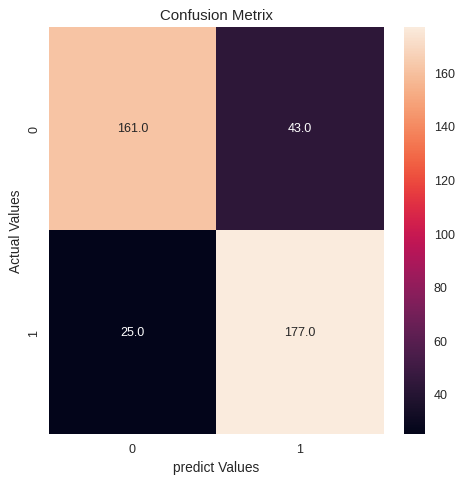

In [ ]:
# plotting confusion metrix
plt.style.use("seaborn")
plt.figure(figsize=(6,6), dpi=90)
sns.heatmap(cm, annot=True, fmt=".1f")
plt.title("Confusion Metrix")
plt.ylabel("Actual Values")
plt.xlabel("predict Values")
plt.show()

# Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_a, y_train)

RandomForestClassifier()

In [ ]:
print(rf.score(x_train_a, y_train)) # train accu
print(rf.score(x_test_a, y_test)) # test accu

1.0
0.9605911330049262


In [ ]:
rf_predictions = rf.predict(x_test_a)
rf_predictions[:5]

array([1, 0, 1, 0, 1])

In [ ]:
# Evaluation 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, rf_predictions)
cr = classification_report(y_test, rf_predictions)
print(cm,"\n")
print("-"*63)
print(cr)

[[190  14]
 [  2 200]] 

---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       204
           1       0.93      0.99      0.96       202

    accuracy                           0.96       406
   macro avg       0.96      0.96      0.96       406
weighted avg       0.96      0.96      0.96       406

